In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Drop duplicated rows
duplicated_rows = df[df.duplicated()]
print("There are a total of {} number of duplicated rows.".format(duplicated_rows.shape[0]))

df.loc[df.duplicated(), :]

# Dropping the duplicated values
df.drop_duplicates(inplace = True)
print("Data shape after dropping the duplicated rows is {}".format(df.shape))

There are a total of 23899 number of duplicated rows.
Data shape after dropping the duplicated rows is (229781, 22)


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

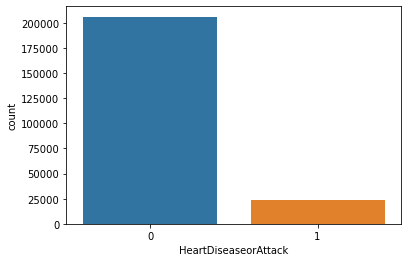

In [5]:
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
sns.countplot(x = df["HeartDiseaseorAttack"])

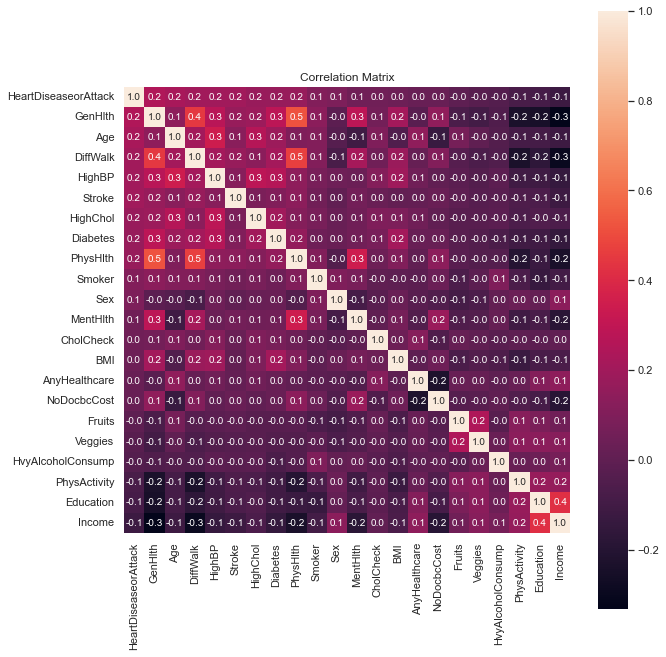

In [6]:
# Correlation plot for the dataset to see which variables are correlated to each other
correlation_matrix = df.corr()
k = 22 # number of variables for heatmap
cols = correlation_matrix.nlargest(k,'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (10, 11))  # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

In [7]:
#data statistics
#cor_matrix = df.corr().abs()
#print(cor_matrix)

#remove duplicate correlation diagonal
#upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

#drop both highly correlated columns
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) or any(upper_tri[column] < 0.01)]
#print(to_drop)

In [11]:
# Dropping columns which are highly correlated
df = df.drop(['Smoker','PhysActivity',
              'Veggies','HvyAlcoholConsump',
              'AnyHealthcare','NoDocbcCost',
              'MentHlth','PhysHlth','DiffWalk',
              'Sex','Age','Education'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  229781 non-null  int32  
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Stroke                229781 non-null  float64
 6   Diabetes              229781 non-null  float64
 7   Fruits                229781 non-null  float64
 8   GenHlth               229781 non-null  float64
 9   Income                229781 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 18.4 MB


In [30]:
# import SMOTE and other over-sampling techniques
from collections import Counter
# pip install imblearn
from imblearn.over_sampling import SMOTE

In [31]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [32]:
# Split train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ", Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 144217, 1: 16629})
After oversampling:  Counter({0: 144217, 1: 144217})


In [15]:
resampled_df = pd.concat([X_train_SMOTE, y_train_SMOTE], axis = 1)
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288434 entries, 0 to 288433
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                288434 non-null  float64
 1   HighChol              288434 non-null  float64
 2   CholCheck             288434 non-null  float64
 3   BMI                   288434 non-null  float64
 4   Stroke                288434 non-null  float64
 5   Diabetes              288434 non-null  float64
 6   Fruits                288434 non-null  float64
 7   GenHlth               288434 non-null  float64
 8   Income                288434 non-null  float64
 9   HeartDiseaseorAttack  288434 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 20.9 MB


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

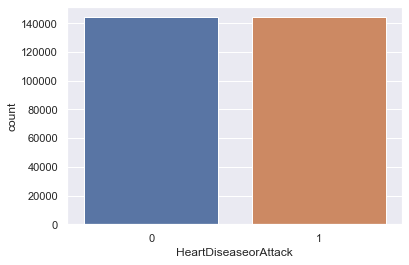

In [16]:
sns.countplot(x = resampled_df["HeartDiseaseorAttack"])

In [17]:
# SMOTE - Naive Bayes
# Basic Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
Gnb = GaussianNB()
Gnb.fit(X_train_SMOTE, y_train_SMOTE)

gnb_ypred_tr = Gnb.predict(X_train_SMOTE)
gnb_ypred_ts = Gnb.predict(X_test)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, gnb_ypred_tr))

print("\n\nTesting Results:\n")
print(classification_report(y_test, gnb_ypred_ts))

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, gnb_ypred_ts))

Training Results:

              precision    recall  f1-score   support

           0       0.74      0.68      0.71    144217
           1       0.70      0.76      0.73    144217

    accuracy                           0.72    288434
   macro avg       0.72      0.72      0.72    288434
weighted avg       0.72      0.72      0.72    288434



Testing Results:

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     61847
           1       0.22      0.75      0.34      7088

    accuracy                           0.69     68935
   macro avg       0.59      0.72      0.57     68935
weighted avg       0.88      0.69      0.75     68935

Naive Bayes Classifier Accuracy:  0.692608979473417


In [18]:
# Under Sampling - LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_SMOTE, y_train_SMOTE)

lr_ypred_tr = lr.predict(X_train_SMOTE)
lr_ypred_ts = lr.predict(X_test)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, lr_ypred_tr))

print("\n\nTesting Results:\n")
print(classification_report(y_test, lr_ypred_ts))

print("Logistic Regression Accuracy is:", accuracy_score(y_test, lr_ypred_ts))

Training Results:

              precision    recall  f1-score   support

           0       0.73      0.72      0.72    144217
           1       0.72      0.73      0.73    144217

    accuracy                           0.72    288434
   macro avg       0.72      0.72      0.72    288434
weighted avg       0.72      0.72      0.72    288434



Testing Results:

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     61847
           1       0.23      0.72      0.35      7088

    accuracy                           0.72     68935
   macro avg       0.59      0.72      0.59     68935
weighted avg       0.88      0.72      0.77     68935

Logistic Regression Accuracy is: 0.7224196707042867


In [18]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", probability=True)
svm.fit(X_train_SMOTE, y_train_SMOTE)

svc_ypred_tr = svm.predict(X_train_SMOTE)
svc_ypred_ts = svm.predict(xtest)

print("Training Results:\n")
print(classification_report(y_train_SMOTE, svc_ypred_tr))
print("\n\nTesting Results:\n")
print(classification_report(ytest, svc_ypred_ts))

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)
X_train_SMOTE = sc.fit_transform(X_train_SMOTE)
X_test = sc.transform(X_test)

(288434, 9)
(288434,)


In [38]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 6)
X_train_SMOTE = pca.fit_transform(X_train_SMOTE)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_
print(explained_variance)



[0.31875227 0.15695207 0.14736593 0.1337207  0.12659006 0.11661897]


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
dtc = DecisionTreeClassifier(max_depth=5, random_state=1)
dtc.fit(X_train_SMOTE,y_train_SMOTE)
y_test_pred = dtc.predict(X_test)
# Evaluate test-set accuracy
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

print("\nReady to continue.")

0.7037499093348807
[[43393 18454]
 [ 1968  5120]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     61847
           1       0.22      0.72      0.33      7088

    accuracy                           0.70     68935
   macro avg       0.59      0.71      0.57     68935
weighted avg       0.88      0.70      0.76     68935


Ready to continue.


In [42]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_SMOTE, y_train_SMOTE)

y_test_pred = xgbc.predict(X_test)
# Evaluate test-set accuracy
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

print("\nReady to continue.")

0.7240298832233263
[[45087 16760]
 [ 2264  4824]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     61847
           1       0.22      0.68      0.34      7088

    accuracy                           0.72     68935
   macro avg       0.59      0.70      0.58     68935
weighted avg       0.88      0.72      0.78     68935


Ready to continue.
